In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.cluster import KMeans
from PIL import Image
from sklearn.utils import shuffle

import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from wordcloud import WordCloud


[nltk_data] Downloading package punkt to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
df = pd.read_csv('D:\KPI Styding\DataAnalysis\car_prediction_data.csv') #використовуємо датасет з 1 ЛР 
df=df.drop(['Car_Name','Present_Price','Owner'], axis=1) 
print(df.head())

   Year  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission
0  2014           3.35       27000    Petrol      Dealer       Manual
1  2013           4.75       43000    Diesel      Dealer       Manual
2  2017           7.25        6900    Petrol      Dealer       Manual
3  2011           2.85        5200    Petrol      Dealer       Manual
4  2014           4.60       42450    Diesel      Dealer       Manual


In [52]:
#переведемо категоріальні фічі в числові значення та маштабуємо їх
df["Fuel_Type"] = LabelEncoder().fit_transform(df["Fuel_Type"])
df["Transmission"] = LabelEncoder().fit_transform(df["Transmission"])
df["Transmission"] = LabelEncoder().fit_transform(df["Seller_Type"]) 
num_cols = df.select_dtypes(include = [np.number]).columns.tolist()
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])
print(df.head())

       Year  Selling_Price  Kms_Driven  Fuel_Type Seller_Type  Transmission
0  0.733333       0.093123    0.053053        1.0      Dealer           0.0
1  0.666667       0.133238    0.085085        0.5      Dealer           0.0
2  0.933333       0.204871    0.012813        1.0      Dealer           0.0
3  0.533333       0.078797    0.009409        1.0      Dealer           0.0
4  0.733333       0.128940    0.083984        0.5      Dealer           0.0


In [53]:
X = df.drop(['Seller_Type'], axis = 1)
Y = df["Seller_Type"]
print(X.shape)

(301, 5)


,Component 0,Component 1,Seller Type
0,-0.312966,0.143653,Dealer
1,-0.414048,-0.176149,Dealer
2,-0.337379,-0.014931,Dealer
3,-0.304750,0.263706,Dealer
4,-0.414879,-0.214766,Dealer
...,...,...,...
296,-0.443244,-0.340339,Dealer
297,-0.319087,0.104076,Dealer
298,-0.306905,0.354380,Dealer
299,-0.454387,-0.402938,Dealer


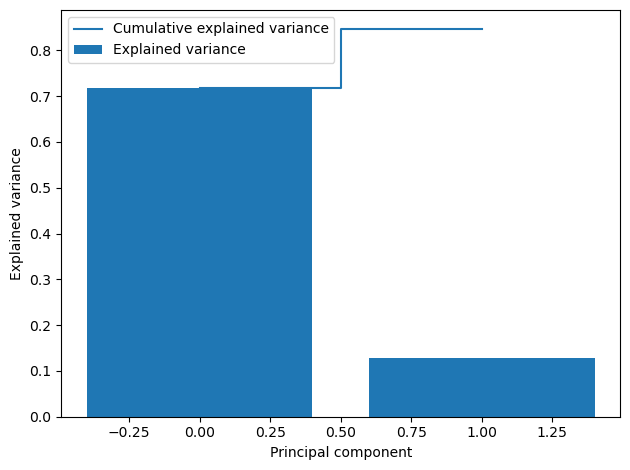

In [54]:
#зменшимо розмірність до 2 через PCA-алгоритм
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

pca_data = pd.DataFrame({"Component 0": pca_result[:, 0], "Component 1": pca_result[:, 1], "Seller Type": Y})
display(pca_data)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

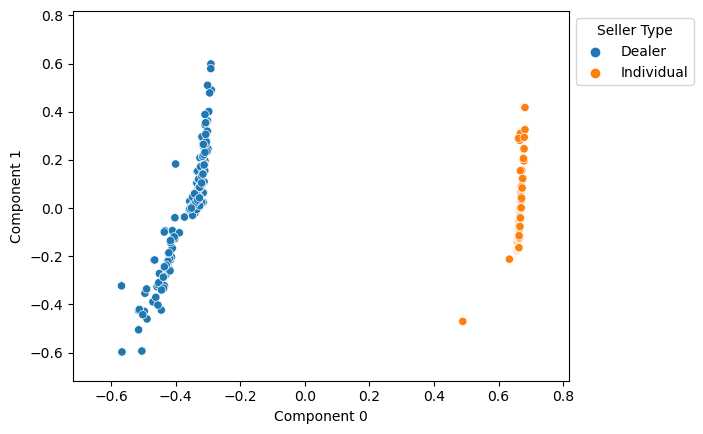

In [55]:
#побудуємо діаграму розсіювання для PCA
min_val = min(pca_data[["Component 0", "Component 1"]].min(axis = 1))
max_val = max(pca_data[["Component 0", "Component 1"]].max(axis = 1))
limit = (min_val*1.2, max_val*1.2)
plt.figure()
scatter = sns.scatterplot(x='Component 0', y='Component 1', hue="Seller Type", data=pca_data)
sns.move_legend(scatter, "upper left", bbox_to_anchor = (1, 1))
scatter.set_xlim(limit)
scatter.set_ylim(limit)
scatter.set_aspect('auto')
plt.show()

In [56]:
# #зменшимо розмірність до 2 через TSNE-алгоритм
tsne = TSNE(n_components = 2, random_state = 10)
tsne_res = tsne.fit_transform(X)
tsne_data = pd.DataFrame({"Component 0": tsne_res[:, 0], "Component 1": tsne_res[:, 1], "Seller Type": Y})
display(tsne_data)

,Component 0,Component 1,Seller Type
0,-9.930861,6.618749,Dealer
1,-5.504772,-21.617554,Dealer
2,-4.990983,14.715970,Dealer
3,-14.006565,0.898904,Dealer
4,-5.189731,-22.631268,Dealer
...,...,...,...
296,-6.807499,-25.039965,Dealer
297,-8.526126,8.626885,Dealer
298,-16.826149,0.241036,Dealer
299,-7.251413,-25.777884,Dealer


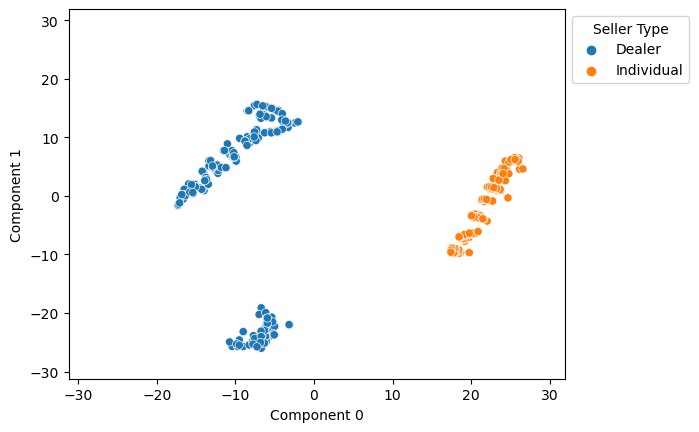

In [49]:
#побудуємо діаграму розсіювання для TSNE
min_val = min(tsne_data[["Component 0", "Component 1"]].min(axis = 1))
max_val = max(tsne_data[["Component 0", "Component 1"]].max(axis = 1))
limit = (min_val*1.2, max_val*1.2)
plt.figure()
scatter = sns.scatterplot(x='Component 0', y='Component 1', hue="Seller Type", data=tsne_data)
sns.move_legend(scatter, "upper left", bbox_to_anchor = (1, 1))
scatter.set_xlim(limit)
scatter.set_ylim(limit)
scatter.set_aspect('auto')
plt.show()

Resolution = 1122 x 1994p = 2237268p, depth = 3
Image contains 140419 unique colors


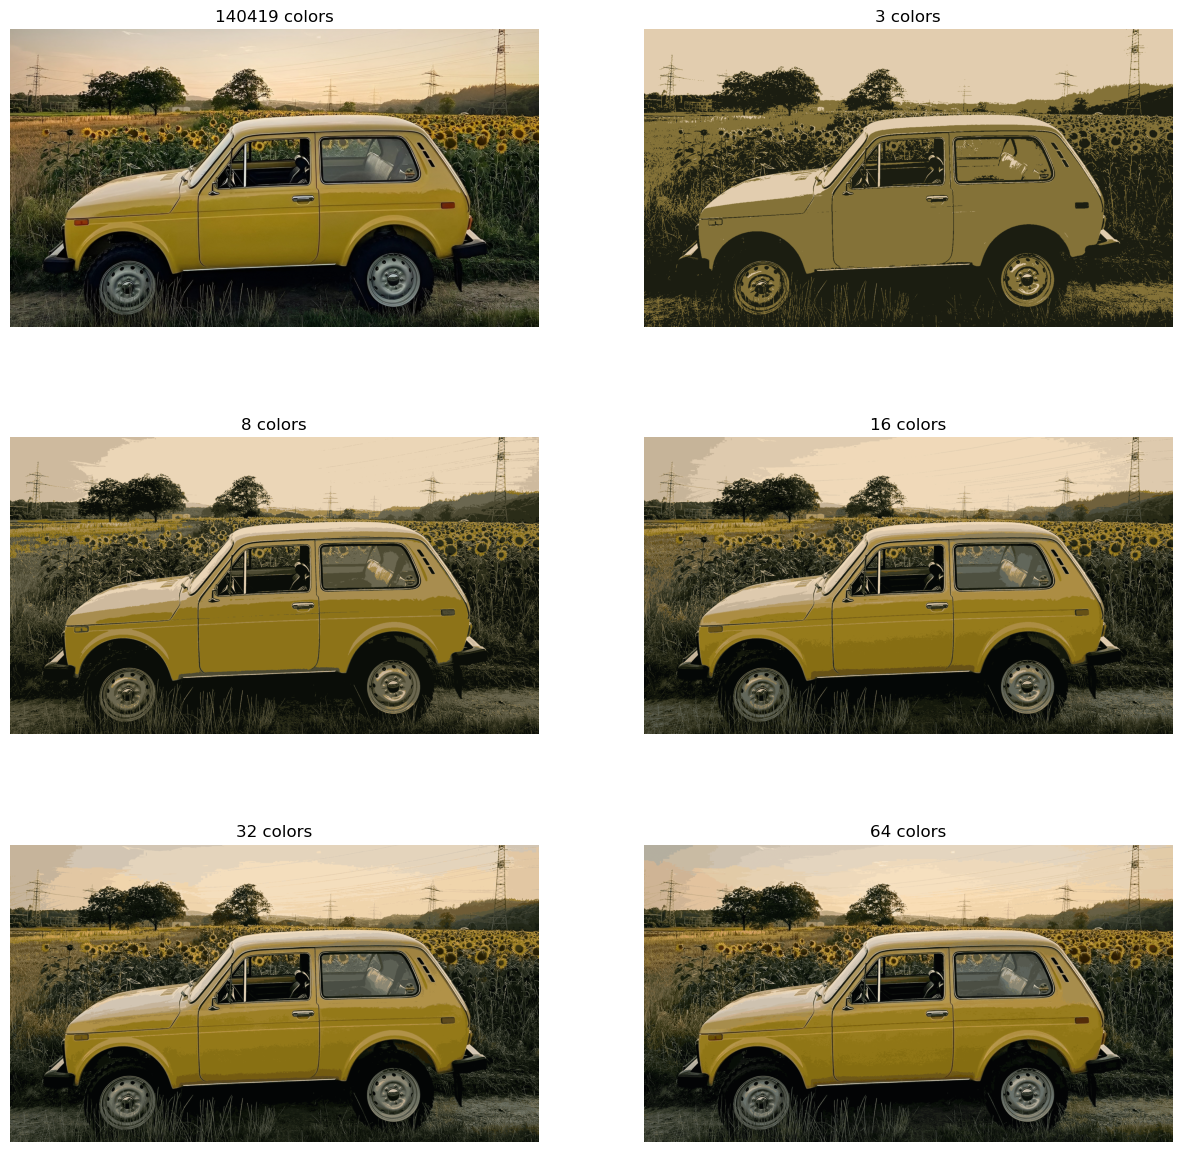

In [90]:
#квантування зображення з допомогою k-means
def Recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

def Show_images(images):
    plt.figure(figsize = (15, 15))
    for i, (num, image) in enumerate(images.items()):
        plt.subplot(3, 2, i + 1)
        plt.imshow(image)
        plt.title(str(num) + " colors")
        plt.axis("off")
    plt.show()
    
    
file_image = "D:\KPI Styding\DataAnalysis\car.jpg"
orig_image = Image.open(file_image)
orig_image = np.array(orig_image)
orig_image = np.array(orig_image, dtype = np.float64) / 255

w, h, d = tuple(orig_image.shape)
print(f"Resolution = {w} x {h}p = {w * h}p, depth = {d}")
pixels = np.reshape(orig_image, (w * h, d))
                 
unique_colors = np.unique(pixels, axis = 0)
number_colors = len(unique_colors)
print(f"Image contains {number_colors} unique colors")

immage_list = {number_colors: orig_image}

for i in [3, 8, 16, 32, 64]:
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 10).fit(sample_array)
    labels = kmeans.predict(pixels)
    new_image = Recreate_image(kmeans.cluster_centers_, labels, w, h)
    immage_list[i] = new_image

Show_images(immage_list)
   

In [76]:
print(labels)


[39 39 39 ... 56 62 56]


In [5]:
#Зчитаємо датасет, видалимо непотрібні поля та оберемо декілька категорій новин з поля "category" для аналізу
text_df = pd.read_json(r'D:\KPI Styding\DataAnalysis\News_Category_Dataset_v3.json', lines=True, encoding = "latin-1")
text_df=text_df.drop(['link','authors','date'], axis=1)
text_df['text'] = text_df['headline'] + text_df['short_description']
text_df = text_df[["category","text"]]
text_df = text_df[text_df["category"].isin(['WORLD NEWS','CRIME','BUSINESS'])]
print(text_df.head())
print(text_df.info())
print(text_df["category"].unique())

      category                                               text
7   WORLD NEWS  Puerto Ricans Desperate For Water After Hurric...
9   WORLD NEWS  Biden At UN To Call Russian War An Affront To ...
10  WORLD NEWS  World Cup Captains Want To Wear Rainbow Armban...
11  WORLD NEWS  Man Sets Himself On Fire In Apparent Protest O...
12  WORLD NEWS  Fiona Threatens To Become Category 4 Storm Hea...
<class 'pandas.core.frame.DataFrame'>
Index: 12853 entries, 7 to 209511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  12853 non-null  object
 1   text      12853 non-null  object
dtypes: object(2)
memory usage: 301.2+ KB
None
['WORLD NEWS' 'CRIME' 'BUSINESS']


In [6]:
# Проведемо передобробку даних, видалимо стоп слова, знаки пунктуації, суфікси і тд
def Clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)  
    words = []
    stop_words = stopwords.words("english")
    for token in tokens:
        if token.isalpha():
            if token not in stop_words:
                words.append(token)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    stemmed_text = " ".join(words)
    return stemmed_text
print(text_df.head())
text_df["text"] = text_df["text"].apply(Clean_text)
print(text_df.head())

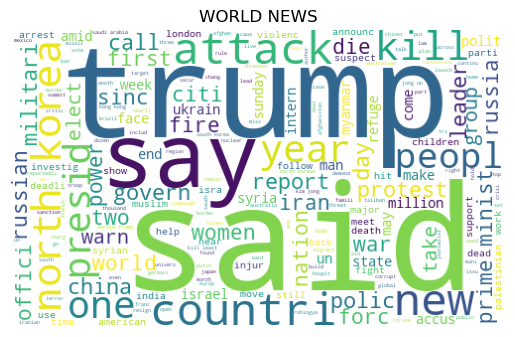

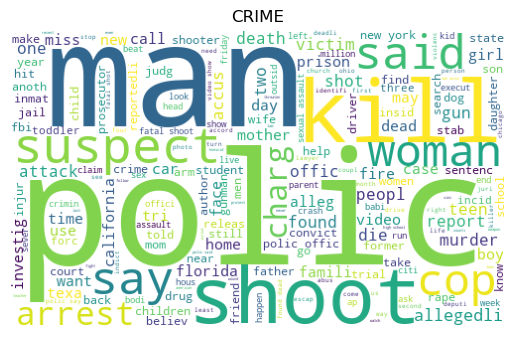

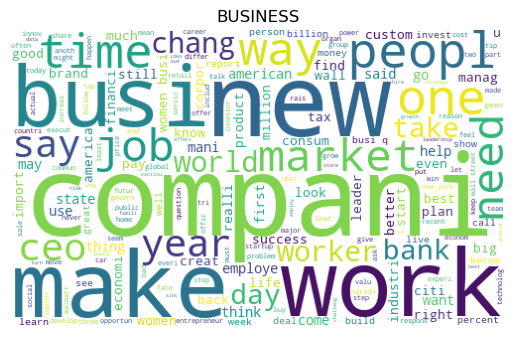

In [8]:
# Візуалізуємо найбільш поширені слова для кожного з типу заголовку
def Show_words(data):
    for category in data["category"].unique(): 
        texts = ""
        for text in data[data["category"] == category]["text"]:
            texts += text + " "
        wordcloud = WordCloud(width = 500, height = 300, background_color = "white", random_state = 10)
        wordcloud = wordcloud.generate(texts)
        plt.figure()
        plt.imshow(wordcloud)
        plt.title(category)
        plt.axis("off")
        plt.show()

Show_words(text_df)

In [19]:
# Векторизуємо текст за допомогою TfidfVectorizer, виконаємо класифікацію.
train, test = train_test_split(text_df, test_size = 0.3)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(train["text"])
tfidf_test =  tfidf_vectorizer.transform(test["text"])

clf = LogisticRegression().fit(tfidf_train, train["category"])

predicted = clf.predict(tfidf_test)
print(classification_report(test["category"], predicted))

              precision    recall  f1-score   support

    BUSINESS       0.88      0.95      0.91      1787
       CRIME       0.88      0.85      0.87      1059
  WORLD NEWS       0.90      0.80      0.85      1010

    accuracy                           0.88      3856
   macro avg       0.89      0.87      0.87      3856
weighted avg       0.88      0.88      0.88      3856



In [22]:
# Векторизуємо текст за допомогою CountVectorizer, виконаємо класифікацію.
train, test = train_test_split(text_df, test_size = 0.3)

count = CountVectorizer()
count_train = count.fit_transform(train["text"])
count_test = count.transform(test["text"])

clf = LogisticRegression().fit(count_train, train["category"])

predicted = clf.predict(count_test)

print(classification_report(test["category"], predicted))

              precision    recall  f1-score   support

    BUSINESS       0.89      0.94      0.92      1788
       CRIME       0.87      0.88      0.87      1042
  WORLD NEWS       0.91      0.81      0.85      1026

    accuracy                           0.89      3856
   macro avg       0.89      0.88      0.88      3856
weighted avg       0.89      0.89      0.89      3856

